# 📝 Exercise M6.04

The aim of this exercise is to:

* verify if a GBDT tends to overfit if the number of estimators is not
  appropriate as previously seen for AdaBoost;
* use the early-stopping strategy to avoid adding unnecessary trees, to
  get the best statistical performances.

We will use the California housing dataset to conduct our experiments.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0, test_size=0.5)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Similarly to the previous exercise, create a gradient boosting decision tree
and create a validation curve to assess the impact of the number of trees
on the statistical performance of the model. Use the mean absolute error
to assess the statistical performance of the model.

In [2]:
# Write your code here.
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import validation_curve
import numpy as np
# nb_estimators = np.unique(np.logspace(0, 1.8, num=30).astype(int))

nb_estimators = list(range(1, 61))
regressor= GradientBoostingRegressor()

train_scores, test_scores = validation_curve(
    regressor, data_train, target_train, param_name="n_estimators", param_range=nb_estimators,
    scoring="neg_mean_absolute_error")
train_errors, test_errors = -train_scores, -test_scores

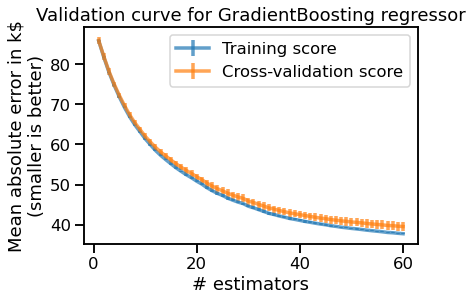

In [3]:
import matplotlib.pyplot as plt

plt.errorbar(nb_estimators, train_errors.mean(axis=1),
             yerr=train_errors.std(axis=1), label="Training score",
             alpha=0.7)
plt.errorbar(nb_estimators, test_errors.mean(axis=1),
             yerr=test_errors.std(axis=1), label="Cross-validation score",
             alpha=0.7)

plt.legend()
plt.ylabel("Mean absolute error in k$\n(smaller is better)")
plt.xlabel("# estimators")
_ = plt.title("Validation curve for GradientBoosting regressor")

Unlike AdaBoost, the gradient boosting model will always improve when
increasing the number of trees in the ensemble. However, it will reach a
plateau where adding new trees will just make fitting and scoring slower.

To avoid adding new unnecessary tree, gradient boosting offers an
early-stopping option. Internally, the algorithm will use an out-of-sample
set to compute the statistical performance of the model at each addition of a
tree. Thus, if the statistical performance are not improving for several
iterations, it will stop adding trees.

Now, create a gradient-boosting model with `n_estimators=1000`. This number
of trees will be too large. Change the parameter `n_iter_no_change` such
that the gradient boosting fitting will stop after adding 5 trees that do not
improve the overall statistical performance.

In [4]:
# Write your code here.
# Write your code here.
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import validation_curve
import numpy as np
# nb_estimators = np.unique(np.logspace(0, 1.8, num=30).astype(int))

regressor= GradientBoostingRegressor(n_estimators=1000, n_iter_no_change=5)

regressor.fit(data_train, target_train)


GradientBoostingRegressor(n_estimators=1000, n_iter_no_change=5)

In [8]:
regressor.train_score_

array([11793.89685785, 10685.26616378,  9725.07767252,  8930.38072385,
        8289.47151565,  7743.72149217,  7294.13141644,  6873.9459535 ,
        6549.72811261,  6249.18745483,  5984.91328524,  5760.54008053,
        5561.71088551,  5388.96434849,  5230.28446401,  5079.5574533 ,
        4944.61541394,  4825.8596265 ,  4701.64944177,  4576.00889395,
        4484.90736999,  4387.64315481,  4225.29951863,  4092.25588248,
        4024.53753004,  3912.51177803,  3855.93827473,  3807.64304535,
        3754.44396364,  3703.48236891,  3661.90177424,  3591.09927787,
        3554.23628572,  3488.04735895,  3446.64885269,  3417.60550963,
        3384.66217236,  3316.92853451,  3296.11077929,  3269.85861774,
        3245.58822971,  3219.40570996,  3195.49482891,  3167.63438542,
        3135.31470114,  3114.24368482,  3098.1824098 ,  3083.95235398,
        3048.35908146,  3031.61960344,  3002.96127233,  2990.48467556,
        2977.1600505 ,  2962.91095329,  2944.35221016,  2929.7177072 ,
      

In [10]:
regressor.n_estimators_

129